In [1]:
import pandas as pd

In [2]:
data = {'x' : [1.,2.,3.,4.,5.], 'y':[1.,3.,4.,6.,5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [3]:
import statsmodels.formula.api as smf
lm_model = smf.ols(formula = 'y~x', data = df ).fit()

In [4]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


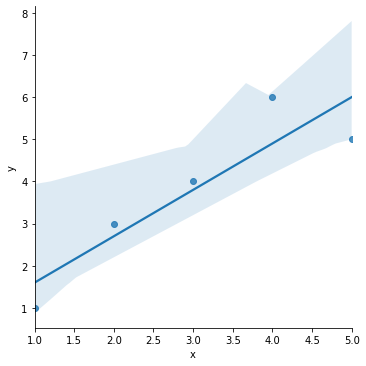

In [7]:
sns.lmplot(x ='x', y='y', data = df)

In [8]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

In [9]:
lm_model.rsquared

0.8175675675675674

/Users/gyeonghankim/opt/anaconda3/envs/dss20/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


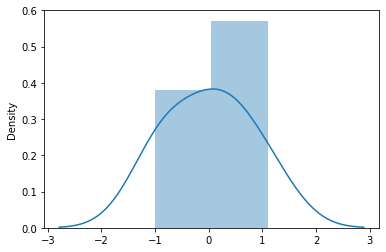

In [11]:
sns.distplot(resid);

In [12]:
import numpy as np
np.poly1d([2,-1])**2 + np.poly1d([3,-5])**2 + np.poly1d([5,-6])**2




poly1d([ 38, -94,  62])

In [14]:
import sympy as sym

In [15]:
th = sym.Symbol('th')
diff_th = sym.diff(38*th**2 - 94*th +62, th)
diff_th

76*th - 94

## 보스톤 집 가격 데이터

In [63]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [64]:
[each for each in boston.feature_names]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [65]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns = boston.feature_names)

boston_pd['price'] = boston.target


boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
import plotly.express as px

fig = px.histogram(boston_pd, x ='price')

fig.show()

<AxesSubplot:>

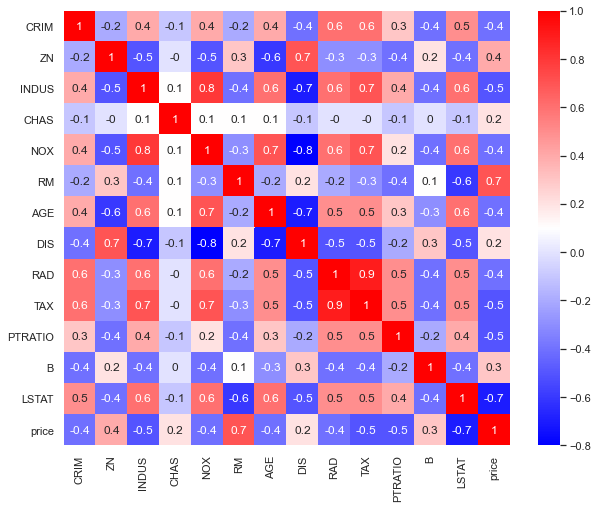

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_mat = round(boston_pd.corr(),1)
sns.set(rc={'figure.figsize' :(10,8)})

sns.heatmap(data=corr_mat, annot = True, cmap = 'bwr')

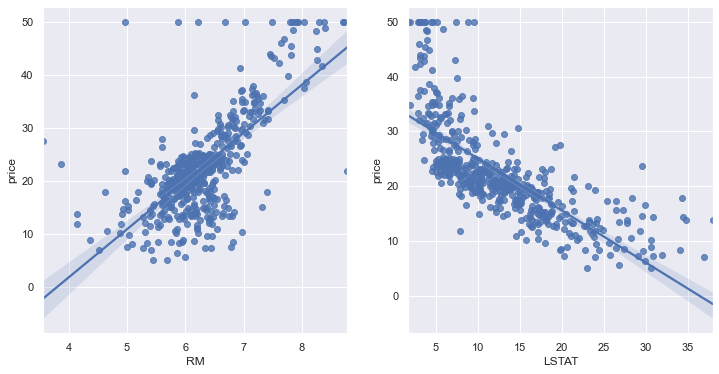

In [75]:
sns.set_style('darkgrid')

sns.set(rc={'figure.figsize' : (12,6)})
fig,ax = plt.subplots(ncols=2)

sns.regplot(x='RM', y = 'price', data = boston_pd, ax = ax[0]) 
sns.regplot(x='LSTAT', y = 'price', data = boston_pd, ax = ax[1]);

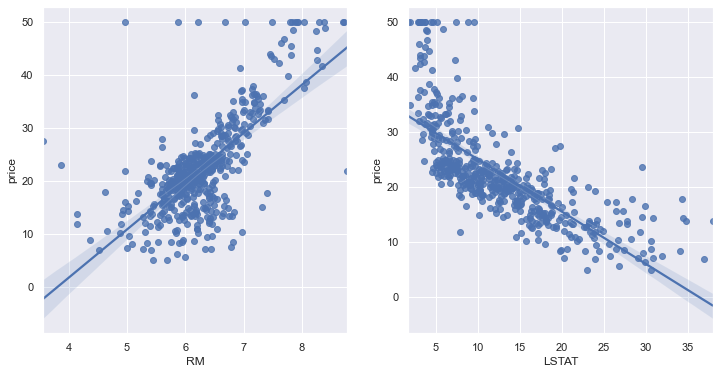

In [69]:
sns.set_style('darkgrid')

sns.set(rc={'figure.figsize' : (12,6)})
fig,ax = plt.subplots(ncols=2)

sns.regplot(x='RM', y = 'price', data = boston_pd, ax = ax[0]) 
sns.regplot(x='LSTAT', y = 'price', data = boston_pd, ax = ax[1]);

In [70]:
from sklearn.model_selection import train_test_split

x = boston_pd.drop(columns=['price'], axis = 1)
y = boston_pd['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 13)

In [71]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [72]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of trin data', rmse_tr)
print('RMSE of test data', rmse_test)


RMSE of trin data 4.642806069019824
RMSE of test data 4.9313525841467


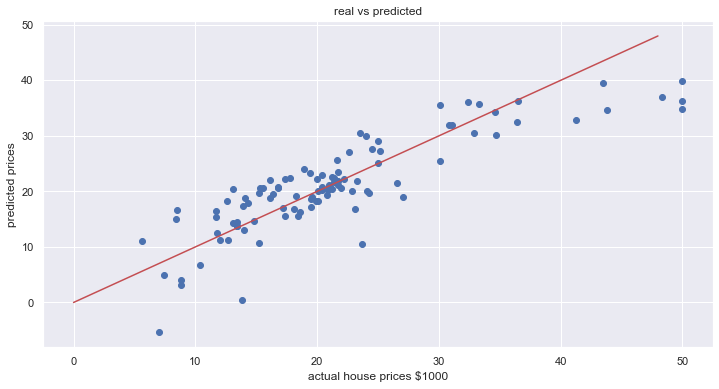

In [73]:
plt.scatter(y_test, pred_test)

plt.xlabel('actual house prices $1000')
plt.ylabel('predicted prices')
plt.title('real vs predicted')

plt.plot([0,48], [0,48], 'r');

In [39]:
x = boston_pd.drop(['price', 'LSTAT'], axis = 1)
y = boston_pd['price']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=13)
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [41]:
pred_tr = reg.predict(x_train)
pred_test = reg.predict(x_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of trin data', rmse_tr)
print('RMSE of test data', rmse_test)

RMSE of trin data 5.165137874244864
RMSE of test data 5.295595032597165


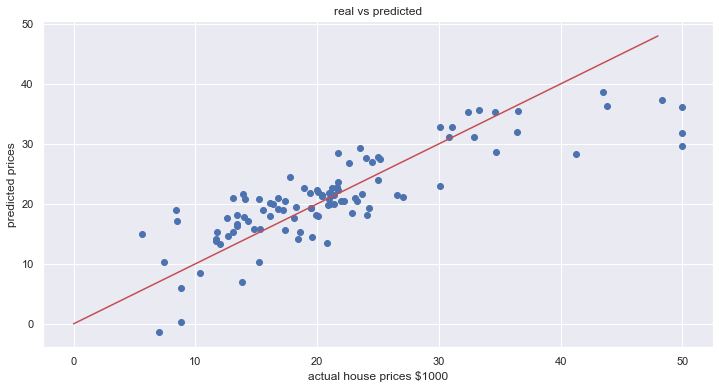

In [42]:
plt.scatter(y_test, pred_test)

plt.xlabel('actual house prices $1000')
plt.ylabel('predicted prices')
plt.title('real vs predicted')

plt.plot([0,48], [0,48], 'r');